In [306]:
pwd

'C:\\Users\\13abh\\Music\\FS_FD'

In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.ensemble import IsolationForest

In [308]:
df = pd.read_csv('PreInterviewTaskData.csv')
df.head(10)


,account,date,fraud,merchant
0,A0,2015-01-01,False,M98
1,A0,2015-01-01,False,M50
2,A0,2015-01-01,False,M55
3,A0,2015-01-01,False,M14
4,A0,2015-01-01,False,M10
5,A0,2015-01-01,False,M33
6,A0,2015-01-01,False,M82
7,A1,2015-01-01,False,M42
8,A1,2015-01-01,False,M98
9,A1,2015-01-01,False,M22


In [309]:
print(df.dtypes)

account     object
date        object
fraud         bool
merchant    object
dtype: object


In [310]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values of '{column}':")
    print(unique_values)
    print()

Unique values of 'account':
['A0' 'A1' 'A2' 'A3' 'A4' 'A5' 'A6' 'A7' 'A8' 'A10' 'A11' 'A12' 'A13'
 'A14' 'A15' 'A16' 'A17' 'A18' 'A19' 'A20' 'A21' 'A22' 'A23' 'A24' 'A25'
 'A26' 'A27' 'A28' 'A29' 'A30' 'A31' 'A32' 'A33' 'A34' 'A35' 'A36' 'A37'
 'A38' 'A39' 'A40' 'A41' 'A42' 'A43' 'A44' 'A45' 'A46' 'A47' 'A48' 'A49'
 'A51' 'A52' 'A53' 'A54' 'A55' 'A56' 'A57' 'A58' 'A59' 'A60' 'A61' 'A62'
 'A63' 'A64' 'A65' 'A66' 'A67' 'A68' 'A69' 'A71' 'A72' 'A74' 'A75' 'A76'
 'A77' 'A78' 'A79' 'A80' 'A81' 'A82' 'A83' 'A84' 'A85' 'A86' 'A88' 'A89'
 'A91' 'A92' 'A93' 'A94' 'A95' 'A96' 'A97' 'A98' 'A99' 'A100' 'A101'
 'A102' 'A104' 'A105' 'A106' 'A107' 'A108' 'A109' 'A110' 'A111' 'A112'
 'A113' 'A114' 'A115' 'A116' 'A117' 'A118' 'A119' 'A120' 'A121' 'A122'
 'A123' 'A124' 'A125' 'A126' 'A127' 'A128' 'A129' 'A130' 'A131' 'A132'
 'A133' 'A134' 'A135' 'A136' 'A137' 'A139' 'A140' 'A141' 'A142' 'A143'
 'A144' 'A145' 'A146' 'A147' 'A148' 'A149' 'A150' 'A151' 'A152' 'A153'
 'A154' 'A155' 'A156' 'A157' 'A158' 'A15

In [311]:
# 1. Check for Missing Values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# 2. Validate Data Types
print("\nData Types:")
print(df.dtypes)

# 3. Validate Unique Values
unique_counts = df.nunique()
print("\nUnique Value Counts:")
print(unique_counts)

# 4. Check Date Range
print("\nDate Range:")
print("Earliest date:", df['date'].min())
print("Latest date:", df['date'].max())

# 5. Verify Fraud Flag Distribution
fraud_counts = df['fraud'].value_counts()
print("\nFraud Flag Distribution:")
print(fraud_counts)


Missing Values:
 account     0
date        0
fraud       0
merchant    0
dtype: int64

Data Types:
account     object
date        object
fraud         bool
merchant    object
dtype: object

Unique Value Counts:
account     1000
date          30
fraud          2
merchant     100
dtype: int64

Date Range:
Earliest date: 2015-01-01
Latest date: 2015-01-30

Fraud Flag Distribution:
False    88503
True      1348
Name: fraud, dtype: int64


In [312]:
df['date'] = pd.to_datetime(df['date'])
print("\nData Types:")
print(df.dtypes)


Data Types:
account             object
date        datetime64[ns]
fraud                 bool
merchant            object
dtype: object


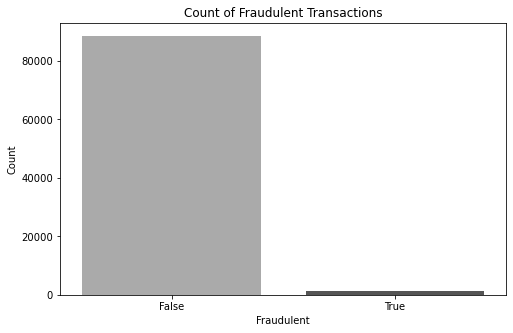

In [313]:
#Count plot of fraud transactions

plt.figure(figsize=(8, 5))
sns.countplot(x='fraud', data=df, palette="binary")
plt.title('Count of Fraudulent Transactions')
plt.xlabel('Fraudulent')
plt.ylabel('Count')
plt.show()


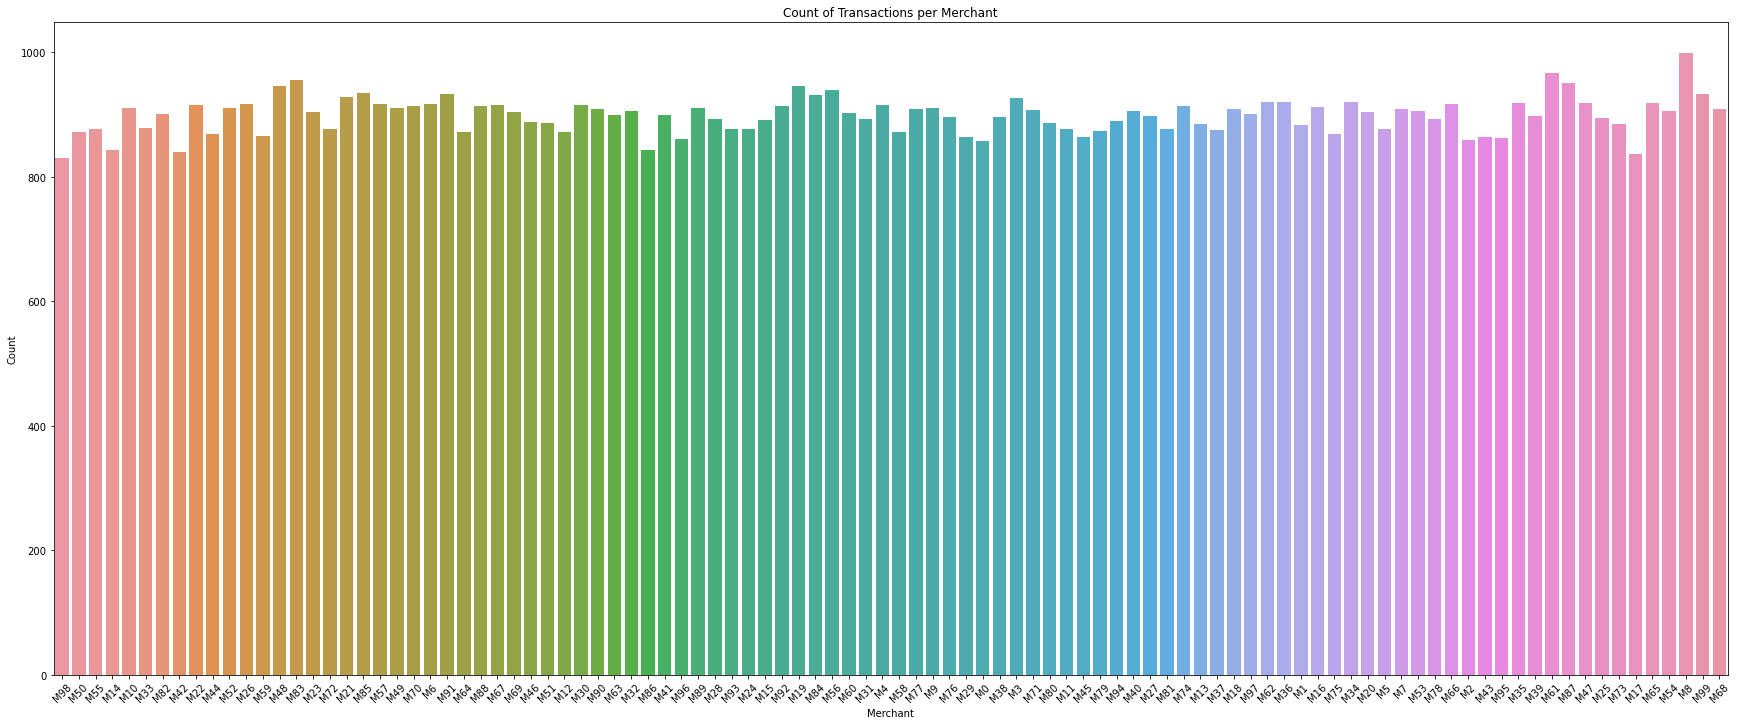

In [314]:
#Count plot of transactions per merchant
plt.figure(figsize=(30, 12))
sns.countplot(x='merchant', data=df)
plt.title('Count of Transactions per Merchant')
plt.xlabel('Merchant')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


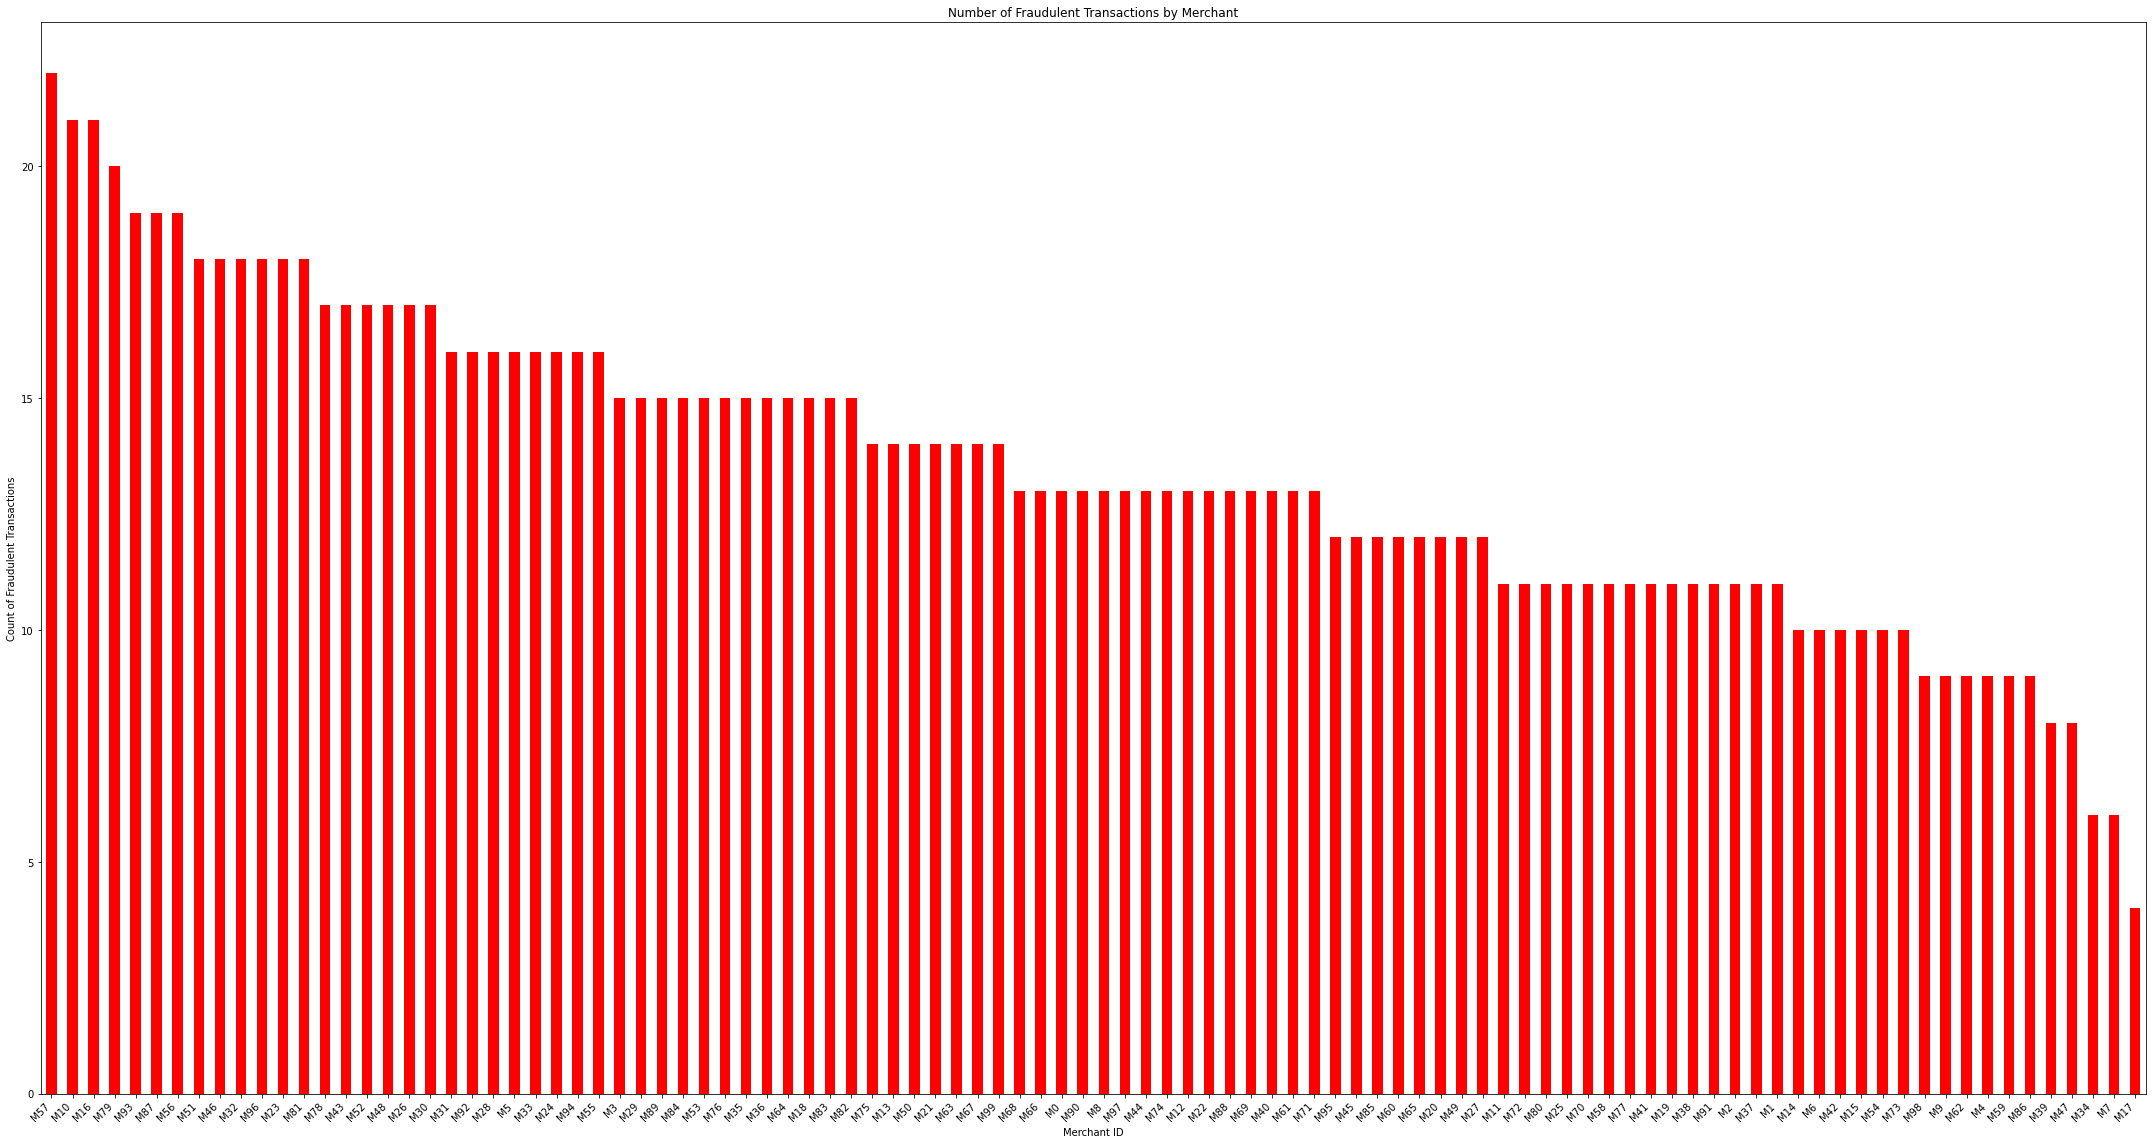

In [315]:
fraudulent_transactions = df[df['fraud'] == True]

fraud_by_merchant = fraudulent_transactions['merchant'].value_counts()


plt.figure(figsize=(30, 16))
fraud_by_merchant.plot(kind='bar', color='red')
plt.title('Number of Fraudulent Transactions by Merchant')
plt.xlabel('Merchant ID')
plt.ylabel('Count of Fraudulent Transactions')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

<Figure size 1800x1080 with 0 Axes>

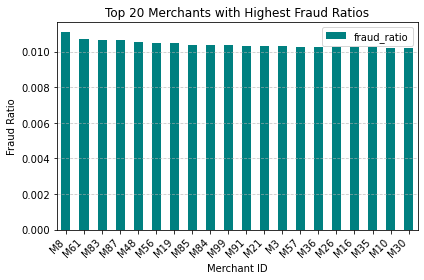

In [316]:
def calculate_fraud_ratio(df):

  #Calculates the fraud ratio (fraudulent transactions / total transactions) per merchant.
  fraudulent_transactions = df.query('fraud == True')['merchant'].value_counts()
  total_transactions = df['merchant'].value_counts()
  merged_data = fraudulent_transactions.add(total_transactions, fill_value=0)
  merged_data = merged_data / merged_data.sum()
  return pd.DataFrame({'merchant': merged_data.index, 'fraud_ratio': merged_data.values})


fraud_ratio_data = calculate_fraud_ratio(df.copy())


top_20_fraud_ratio = fraud_ratio_data.nlargest(20, 'fraud_ratio')


plt.figure(figsize=(25, 15))
top_20_fraud_ratio.plot(kind='bar', x='merchant', y='fraud_ratio', color='teal')
plt.title('Top 20 Merchants with Highest Fraud Ratios')
plt.xlabel('Merchant ID')
plt.ylabel('Fraud Ratio')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

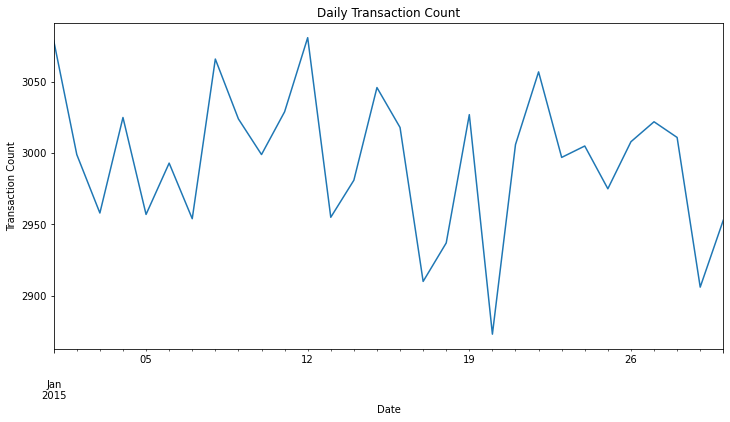

In [317]:
# Plot for daily transaction count
daily_transactions = df.groupby('date').size()


plt.figure(figsize=(12, 6))
daily_transactions.plot()
plt.title('Daily Transaction Count')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.show()


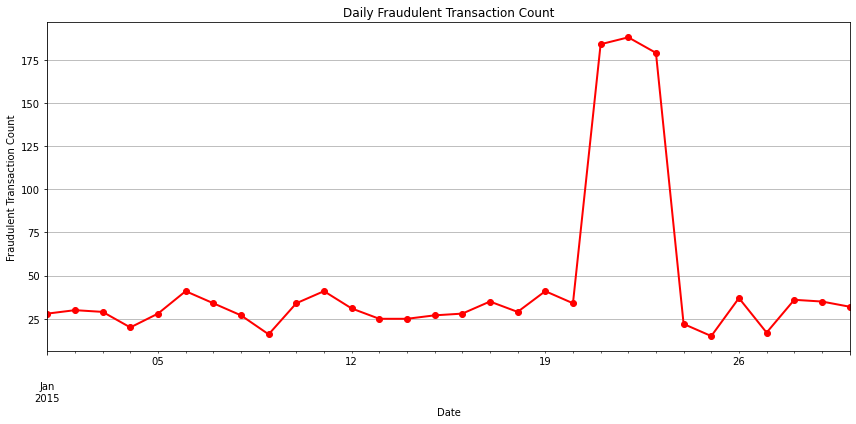

In [318]:
# Fraud count with Filter transactions where Fraud = True
fraudulent_transactions = df[df['fraud'] == True]

daily_fraudulent_transactions = fraudulent_transactions.groupby('date').size()

plt.figure(figsize=(12, 6))
daily_fraudulent_transactions.plot(marker='o', color='r', linestyle='-', linewidth=2)
plt.title('Daily Fraudulent Transaction Count')
plt.xlabel('Date')
plt.ylabel('Fraudulent Transaction Count')
plt.grid(True)
plt.tight_layout()
plt.show()

In [319]:
summary_stats = df.describe(include='all')
print(summary_stats)


       account                 date  fraud merchant
count    89851                89851  89851    89851
unique    1000                   30      2      100
top       A831  2015-01-12 00:00:00  False       M8
freq       121                 3081  88503      998
first      NaN  2015-01-01 00:00:00    NaN      NaN
last       NaN  2015-01-30 00:00:00    NaN      NaN


C:\Users\13abh\AppData\Local\Temp\ipykernel_21680\3910909983.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  summary_stats = df.describe(include='all')


In [320]:
from collections import Counter

fraudulent_accounts = df[df['fraud'] == True]['account'].unique()
compromised_transactions = df[df['account'].isin(fraudulent_accounts) & (df['fraud'] == False)]

merchant_counter = Counter(compromised_transactions['merchant'])
compromised_merchant = merchant_counter.most_common(1)[0][0]

print(f"The identity of the compromised merchant is: {compromised_merchant}")


The identity of the compromised merchant is: M8


In [321]:
# Balancing dataset with RandomOverSampler
ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(df.drop('fraud', axis=1), df['fraud'])

balanced_df = pd.DataFrame(X_resampled, columns=df.drop('fraud', axis=1).columns)
balanced_df['fraud'] = y_resampled

print(balanced_df['fraud'].value_counts())


False    88503
True     88503
Name: fraud, dtype: int64


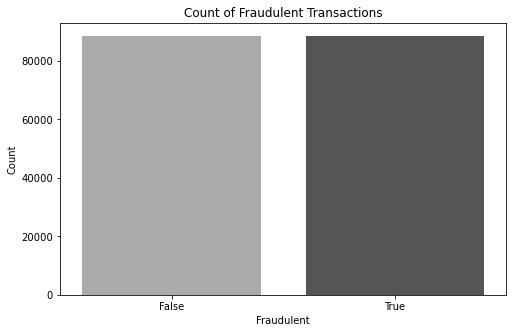

In [322]:
plt.figure(figsize=(8, 5))
sns.countplot(x='fraud', data=balanced_df, palette="binary")
plt.title('Count of Fraudulent Transactions')
plt.xlabel('Fraudulent')
plt.ylabel('Count')
plt.show()

In [ ]:
#-------------K-Means------------

In [172]:
from sklearn.preprocessing import LabelEncoder

fraudulent_transactions = balanced_df[balanced_df['fraud']]

# Convert categorical variables to numerical features
le_account = LabelEncoder()
le_merchant = LabelEncoder()

fraudulent_transactions['account_encoded'] = le_account.fit_transform(fraudulent_transactions['account'])
fraudulent_transactions['merchant_encoded'] = le_merchant.fit_transform(fraudulent_transactions['merchant'])


X = fraudulent_transactions[['account_encoded', 'merchant_encoded']].values


silhouette_scores = []
for k in range(8, 12): 
    kmeans = KMeans(n_clusters=k, random_state=1)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters={k}, the average silhouette score is {silhouette_avg:.4f}")


C:\Users\13abh\AppData\Local\Temp\ipykernel_21680\1355151783.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraudulent_transactions['account_encoded'] = le_account.fit_transform(fraudulent_transactions['account'])
C:\Users\13abh\AppData\Local\Temp\ipykernel_21680\1355151783.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraudulent_transactions['merchant_encoded'] = le_merchant.fit_transform(fraudulent_transactions['merchant'])


For n_clusters=2, the average silhouette score is 0.6105
For n_clusters=3, the average silhouette score is 0.5242
For n_clusters=4, the average silhouette score is 0.4838
For n_clusters=5, the average silhouette score is 0.4576
For n_clusters=6, the average silhouette score is 0.4148


KeyboardInterrupt: 

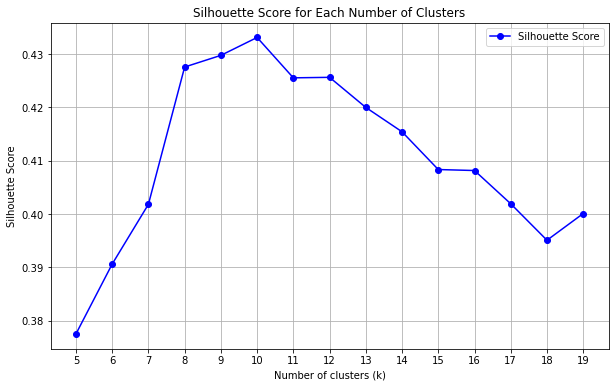

Optimal number of clusters: 10


In [349]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

# Assuming X is your data matrix for clustering

# Range of k values to evaluate
k_range = range(1, 9)  
silhouette_scores = []

# Perform K-means clustering for each value of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
    silhouette_scores.append(silhouette_score)

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='b', label='Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Each Number of Clusters')
plt.xticks(k_range)
plt.legend()
plt.grid(True)
plt.show()

# Find the optimal k with the highest silhouette score
optimal_k = k_range[np.argmax(silhouette_scores)]
print("Optimal number of clusters:", optimal_k)


In [345]:
from sklearn.preprocessing import LabelEncoder

fraudulent_transactions = balanced_df[balanced_df['fraud']==True]

X = fraudulent_transactions[['merchant', 'date']]

X['date'] = pd.to_datetime(X['date']).apply(lambda x: x.toordinal())

le = LabelEncoder()
X['merchant'] = le.fit_transform(X['merchant'])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=9, random_state=0)  # Adjust number of clusters as needed
kmeans.fit(X)

X['cluster'] = kmeans.labels_

# Analyze the clusters to find the compromised merchant
cluster_counts = X.groupby('cluster').size()
largest_cluster = cluster_counts.idxmax()

compromised_cluster = X[X['cluster'] == largest_cluster]

# Get the most frequent merchant in the compromised cluster
compromised_merchant_label = compromised_cluster['merchant'].value_counts().idxmax()
compromised_merchant = le.inverse_transform([compromised_merchant_label])[0]

print("Compromised Merchant:", compromised_merchant)


C:\Users\13abh\AppData\Local\Temp\ipykernel_21680\1720929015.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['date'] = pd.to_datetime(X['date']).apply(lambda x: x.toordinal())
C:\Users\13abh\AppData\Local\Temp\ipykernel_21680\1720929015.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['merchant'] = le.fit_transform(X['merchant'])


Compromised Merchant: M57


C:\Users\13abh\AppData\Local\Temp\ipykernel_21680\1720929015.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans.labels_


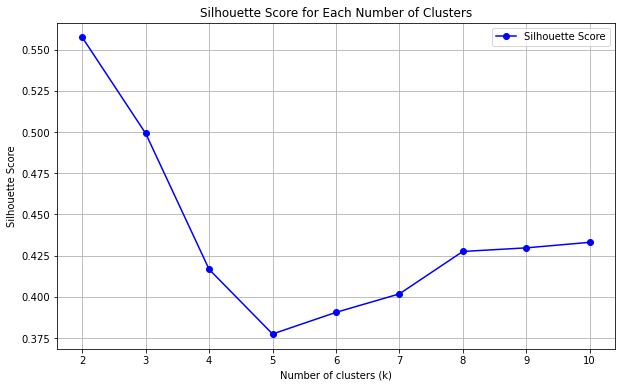

Optimal number of clusters: 2


In [227]:
#-----------------DBSCAN-----------------

Compromised Merchant: M10


In [324]:
from sklearn.preprocessing import StandardScaler

eps_range = np.linspace(0.03, 0.05, 10) 
min_samples_range = np.arange(6, 10, 1)  

best_silhouette_score = -1
best_eps = None
best_min_samples = None
best_clusters = None

# Iterate over all combinations of eps and min_samples
for eps in eps_range:
    for min_samples in min_samples_range:
        # Apply DBSCAN clustering
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_scaled)
        
        # Evaluate clustering performance using silhouette score
        silhouette = silhouette_score(X_scaled, clusters)
        
        # Track the best parameters
        if silhouette > best_silhouette_score:
            best_silhouette_score = silhouette
            best_eps = eps
            best_min_samples = min_samples
            best_clusters = clusters

print(f"Best Parameters: eps = {best_eps}, min_samples = {best_min_samples}")
print(f"Best Silhouette Score: {best_silhouette_score}")

Best Parameters: eps = 0.03666666666666667, min_samples = 6
Best Silhouette Score: 0.7380808274411298


In [328]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


fraudulent_transaction = balanced_df[balanced_df['fraud'] == True]

#Group by merchant and date, count fraudulent transactions
fraudulent_counts = fraudulent_transaction.groupby(['merchant', 'date']).size().reset_index(name='fraudulent_count')


X = fraudulent_counts[['fraudulent_count']].values.astype(float)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=6)  # Adjust eps and min_samples as per your data
clusters = dbscan.fit_predict(X_scaled)

fraudulent_counts['cluster'] = clusters

# Find the cluster that represents the compromised merchant
anomalous_cluster = fraudulent_counts[fraudulent_counts['cluster'] == -1]

compromised_merchant = anomalous_cluster['merchant'].values[0]

print(f"Compromised Merchant: {compromised_merchant}")


Compromised Merchant: M10


In [ ]:
#--------------Isolation Forest-------------

In [329]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler


fraudulent_transaction = balanced_df[balanced_df['fraud'] == True]

fraudulent_counts = fraudulent_transaction.groupby(['merchant', 'date']).size().reset_index(name='fraudulent_count')

X = fraudulent_counts[['fraudulent_count']].values.astype(float)

#Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Apply Isolation Forest
iso_forest = IsolationForest(random_state=0)
iso_forest.fit(X_scaled)

# Predict outliers (anomalies)
outliers = iso_forest.predict(X_scaled)

# Add anomaly labels to the dataframe
fraudulent_counts['anomaly'] = outliers

compromised_merchant = fraudulent_counts[fraudulent_counts['anomaly'] == -1]['merchant'].value_counts().idxmax()

print(f"Compromised Merchant: {compromised_merchant}")


Compromised Merchant: M78


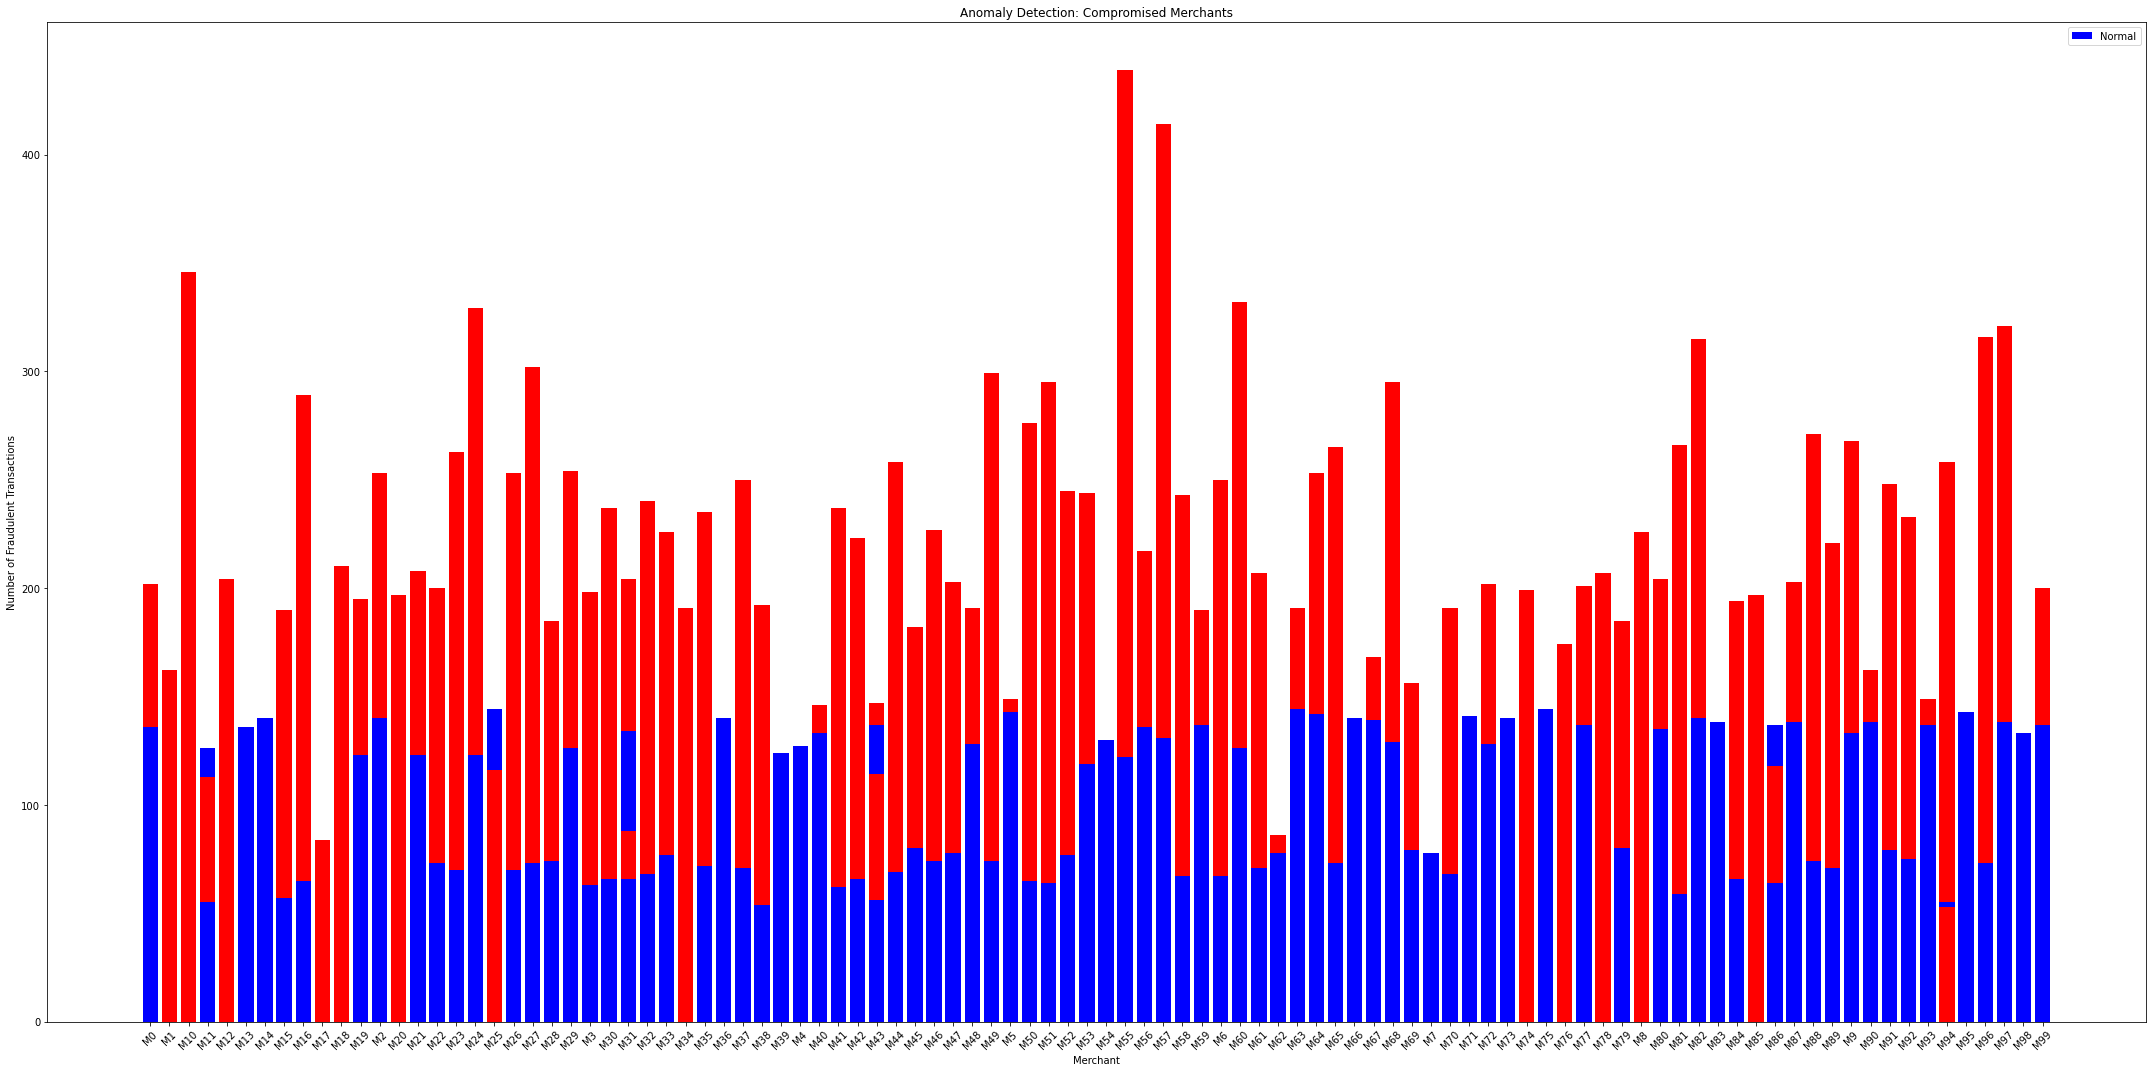

In [279]:
# Visualization
plt.figure(figsize=(30, 15))
colors = np.where(fraudulent_counts['anomaly'] == -1, 'red', 'blue')  # Red for anomalies, blue for normal
plt.bar(fraudulent_counts['merchant'], fraudulent_counts['fraudulent_count'], color=colors)
plt.xlabel('Merchant')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Anomaly Detection: Compromised Merchants')
plt.xticks(rotation=45)
plt.legend(['Normal', 'Anomaly'])
plt.tight_layout()
plt.show()


C:\Users\13abh\AppData\Local\Temp\ipykernel_21680\786483883.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merchant_data['date'] = pd.to_datetime(merchant_data['date'])


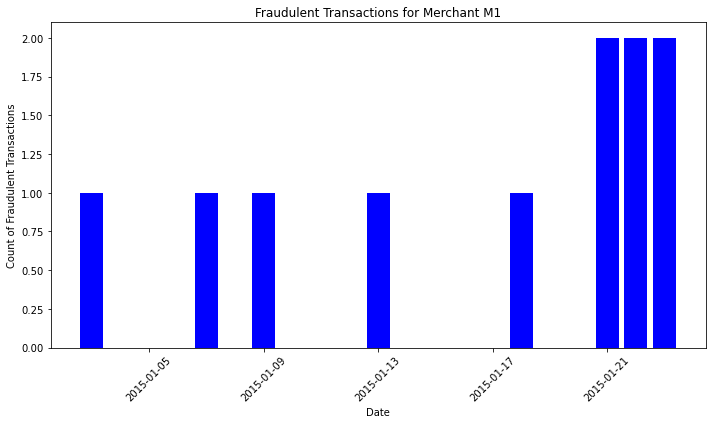

C:\Users\13abh\AppData\Local\Temp\ipykernel_21680\786483883.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merchant_data['date'] = pd.to_datetime(merchant_data['date'])


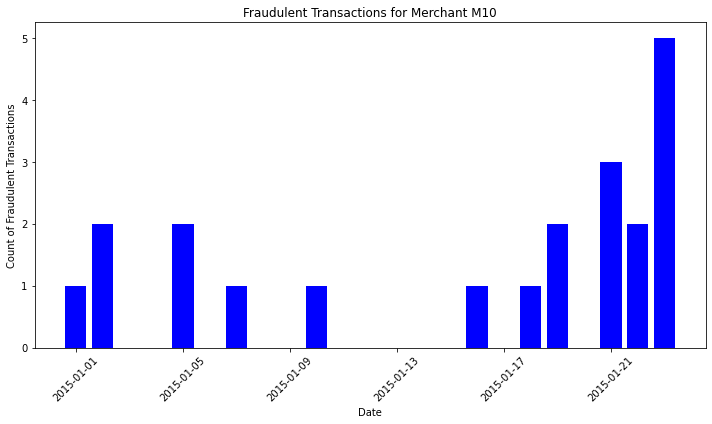

C:\Users\13abh\AppData\Local\Temp\ipykernel_21680\786483883.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merchant_data['date'] = pd.to_datetime(merchant_data['date'])


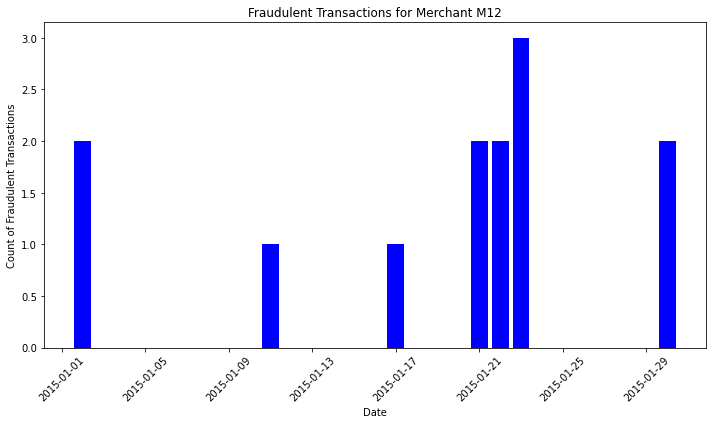

C:\Users\13abh\AppData\Local\Temp\ipykernel_21680\786483883.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merchant_data['date'] = pd.to_datetime(merchant_data['date'])


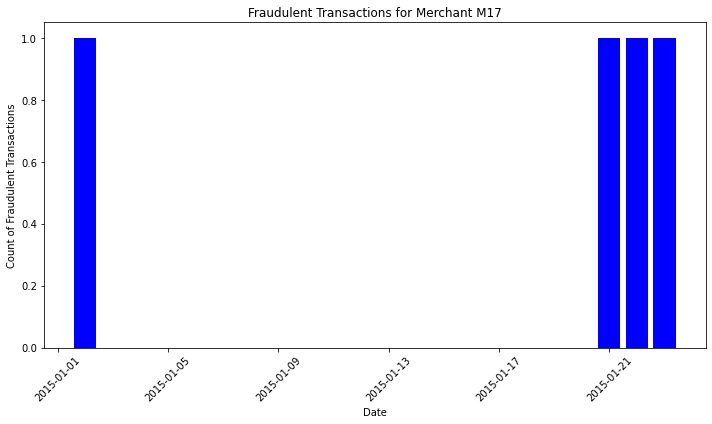

C:\Users\13abh\AppData\Local\Temp\ipykernel_21680\786483883.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merchant_data['date'] = pd.to_datetime(merchant_data['date'])


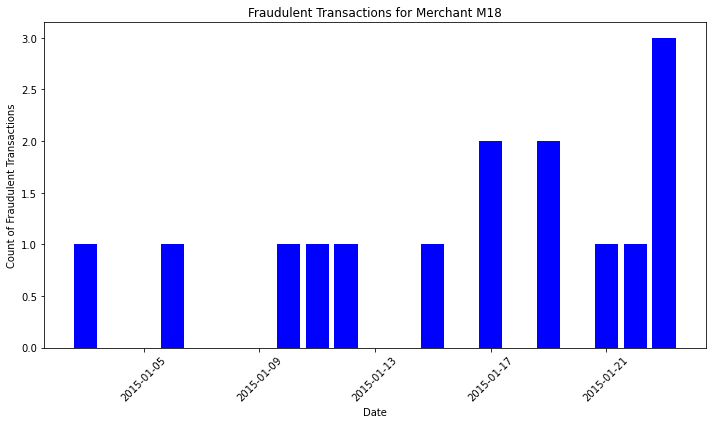

C:\Users\13abh\AppData\Local\Temp\ipykernel_21680\786483883.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merchant_data['date'] = pd.to_datetime(merchant_data['date'])


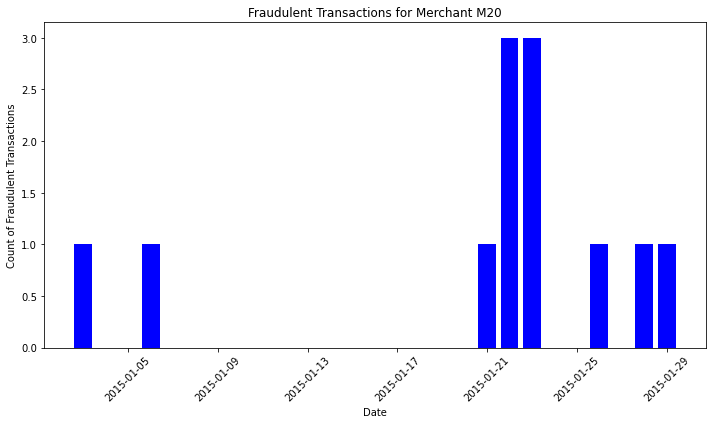

C:\Users\13abh\AppData\Local\Temp\ipykernel_21680\786483883.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merchant_data['date'] = pd.to_datetime(merchant_data['date'])


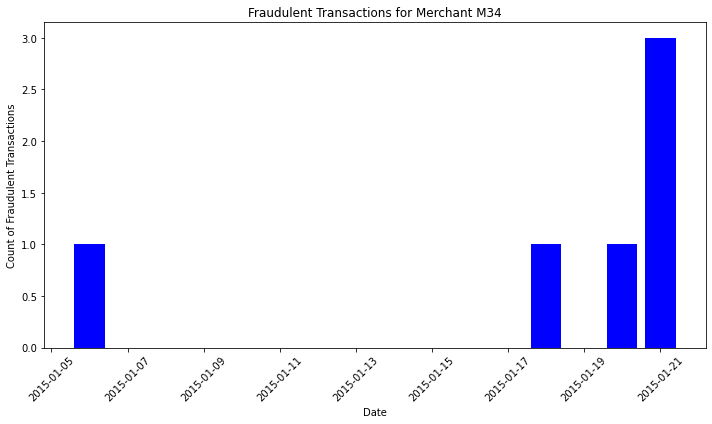

C:\Users\13abh\AppData\Local\Temp\ipykernel_21680\786483883.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merchant_data['date'] = pd.to_datetime(merchant_data['date'])


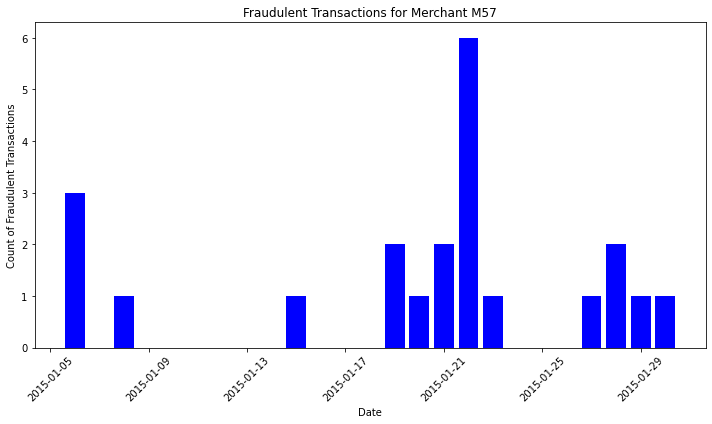

C:\Users\13abh\AppData\Local\Temp\ipykernel_21680\786483883.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merchant_data['date'] = pd.to_datetime(merchant_data['date'])


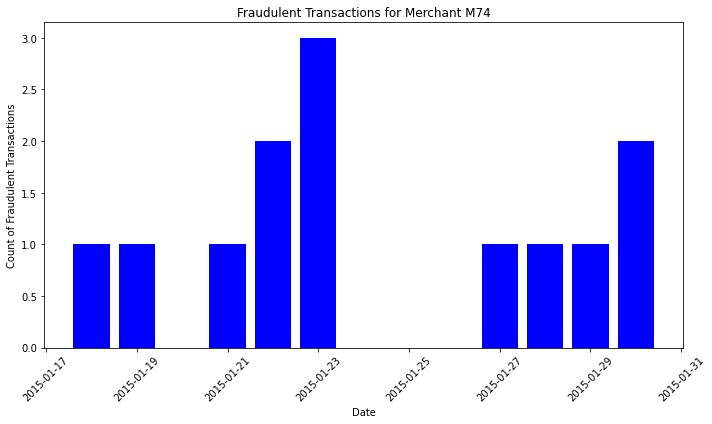

C:\Users\13abh\AppData\Local\Temp\ipykernel_21680\786483883.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merchant_data['date'] = pd.to_datetime(merchant_data['date'])


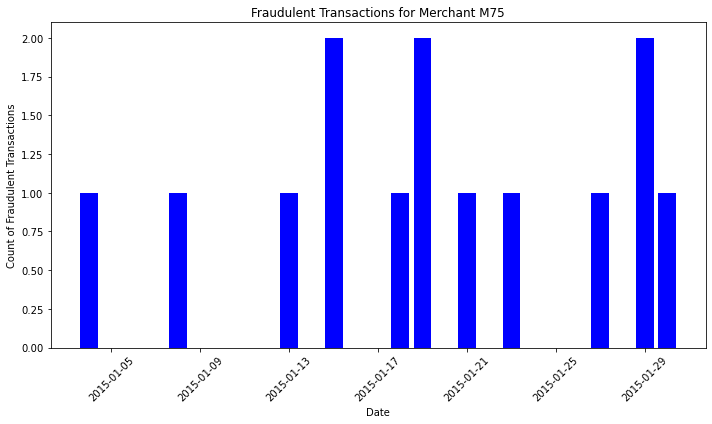

C:\Users\13abh\AppData\Local\Temp\ipykernel_21680\786483883.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merchant_data['date'] = pd.to_datetime(merchant_data['date'])


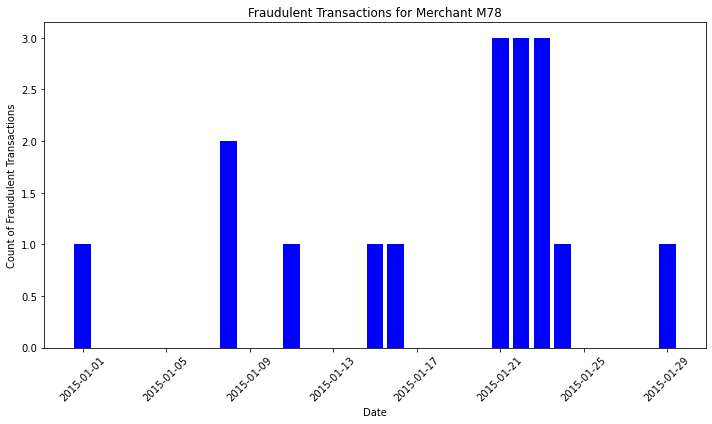

C:\Users\13abh\AppData\Local\Temp\ipykernel_21680\786483883.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merchant_data['date'] = pd.to_datetime(merchant_data['date'])


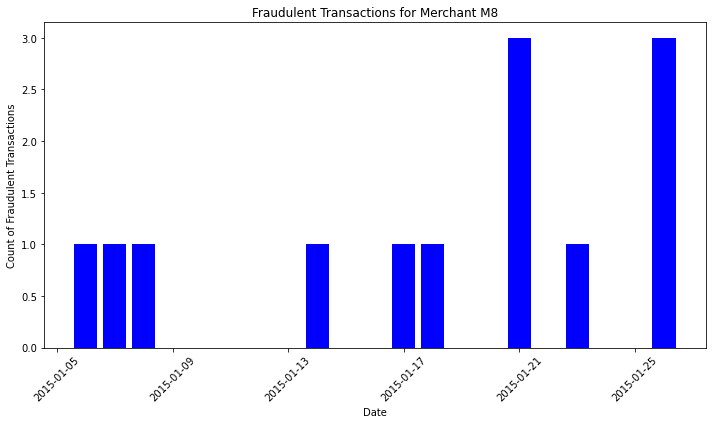

In [305]:

# Filter data for the specified merchants
merchants_of_interest = ['M1', 'M10', 'M12', 'M17', 'M18', 'M20', 'M34','M57', 'M74', 'M75', 'M78', 'M8']
filtered_data = df[df['merchant'].isin(merchants_of_interest) & (df['fraud'] == True)]

# Group by merchant and date, count fraudulent transactions
fraudulent_counts = filtered_data.groupby(['merchant', 'date']).size().reset_index(name='fraudulent_count')

# Iterate over each merchant and create a bar graph
for merchant in merchants_of_interest:
    merchant_data = fraudulent_counts[fraudulent_counts['merchant'] == merchant]
    
    merchant_data['date'] = pd.to_datetime(merchant_data['date'])
    merchant_data = merchant_data.sort_values(by='date')
    
    plt.figure(figsize=(10, 6))
    plt.bar(merchant_data['date'], merchant_data['fraudulent_count'], color='blue')
    plt.xlabel('Date')
    plt.ylabel('Count of Fraudulent Transactions')
    plt.title(f'Fraudulent Transactions for Merchant {merchant}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


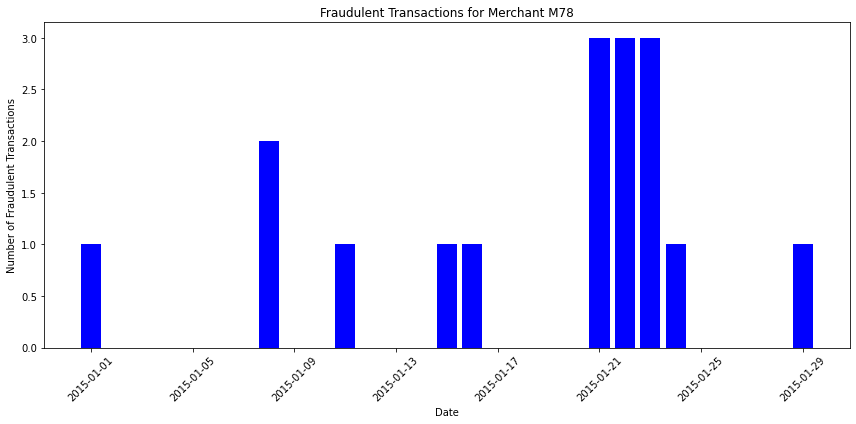

Dates of exploitation for Merchant M78:
5   2015-01-21
6   2015-01-22
7   2015-01-23
Name: date, dtype: datetime64[ns]


In [301]:
merchant = 'M78'
merchant_data = df[(df['merchant'] == merchant) & (df['fraud'] == True)]

#Group by date and count fraudulent transactions
fraudulent_counts = merchant_data.groupby('date').size().reset_index(name='fraudulent_count')

threshold = fraudulent_counts['fraudulent_count'].mean() + 1 * fraudulent_counts['fraudulent_count'].std()

# Dates of exploitation
exploitation_dates = fraudulent_counts[fraudulent_counts['fraudulent_count'] > threshold]['date']
print(f"Dates of exploitation for Merchant {merchant}:")
print(compromise_dates)


In [ ]:
#---------------THE END ----------------------